In [105]:
import pandas as pd
import numpy as np
import os
from dotenv import load_dotenv
# will need to run: pip install quandl
import quandl
import plotly.express as px
import plotly.graph_objects as go

In [106]:
#import consumer price data from quandl API. Imports directly as a DataFrame
CPI = quandl.get("RATEINF/CPI_USA")
PPI = quandl.get("FRED/PPIACO")

In [107]:
# Convert CPI/PPI into inflation rate. Calculates the change in CPI/PPI (compared to the same month in the prior year). For example: March 2021 Inflation Rate = (March 2021 CPI - March 2020 CPI)/March 2020 CPI
inflation_rate_cpi = (CPI - CPI.shift(12))/CPI.shift(12)
inflation_rate_ppi = (PPI - PPI.shift(12))/PPI.shift(12)

In [108]:
# Drop Nulls and set column headers
inflation_rate_cpi = inflation_rate_cpi.dropna()
inflation_rate_cpi.columns = ['Inflation Rate CPI']
inflation_rate_cpi['Inflation Rate CPI'] = inflation_rate_cpi['Inflation Rate CPI']*100
inflation_rate_ppi = inflation_rate_ppi.dropna()
inflation_rate_ppi.columns = ['Inflation Rate PPI']
inflation_rate_ppi['Inflation Rate PPI'] = inflation_rate_ppi['Inflation Rate PPI']*100


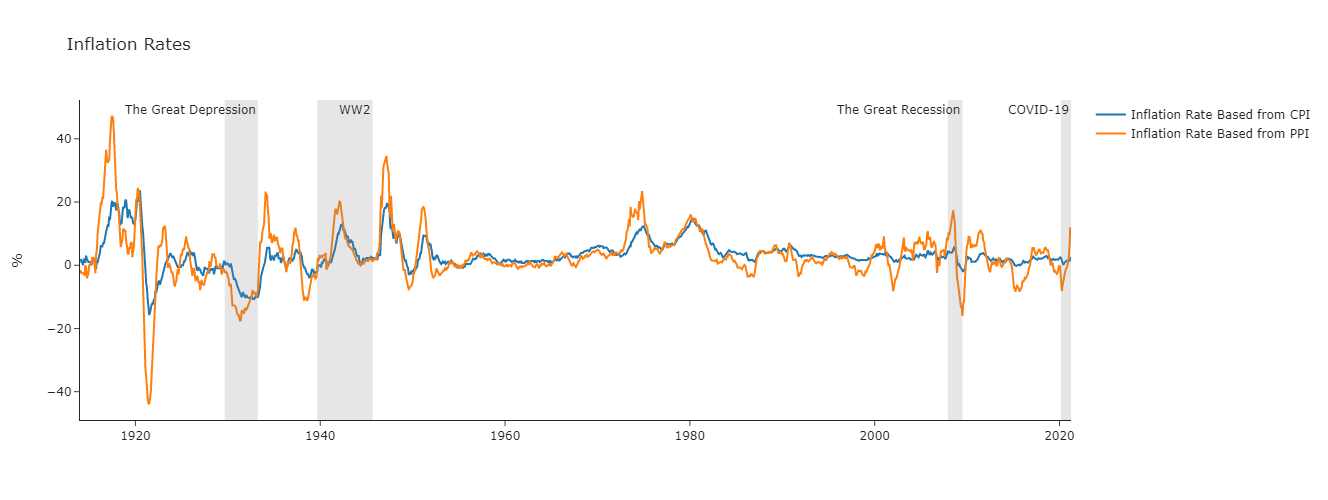

In [109]:
# Make a plotly graph_objects "Figure" and then add the inflation Rate Lines
inflation_rates_chart = go.Figure().update_layout(template="simple_white", yaxis=dict(title="%"), title = "Inflation Rates", height = 500)
inflation_rates_chart.add_trace(go.Scatter(x= inflation_rate_cpi.index, y=inflation_rate_cpi["Inflation Rate CPI"],mode='lines', name="Inflation Rate Based from CPI"))
inflation_rates_chart.add_trace(go.Scatter(x= inflation_rate_ppi.index, y=inflation_rate_ppi["Inflation Rate PPI"],mode='lines',name="Inflation Rate Based from PPI"))
inflation_rates_chart.add_vrect(x0=inflation_rate_cpi.index[inflation_rate_cpi.index=='1929-08-31'][0], x1=inflation_rate_cpi.index[inflation_rate_cpi.index=='1933-03-31'][0], line_width=0, fillcolor="grey", opacity=0.2, annotation_text = "The Great Depression")
inflation_rates_chart.add_vrect(x0=inflation_rate_cpi.index[inflation_rate_cpi.index=='1939-08-31'][0], x1=inflation_rate_cpi.index[inflation_rate_cpi.index=='1945-08-31'][0], line_width=0, fillcolor="grey", opacity=0.2, annotation_text = "WW2")
inflation_rates_chart.add_vrect(x0=inflation_rate_cpi.index[inflation_rate_cpi.index=='2007-11-30'][0], x1=inflation_rate_cpi.index[inflation_rate_cpi.index=='2009-06-30'][0], line_width=0, fillcolor="grey", opacity=0.2, annotation_text = "The Great Recession")
inflation_rates_chart.add_vrect(x0=inflation_rate_cpi.index[inflation_rate_cpi.index=='2020-02-29'][0], x1=inflation_rate_cpi.index[-1], line_width=0, fillcolor="grey", opacity=0.2, annotation_text = "COVID-19")

In [18]:
# Get M1 Money Supply
M_1= quandl.get("FRED/M1SL")
# Get M2 Money Supply
M_2= quandl.get("FRED/M2SL")
# Concat M1 and M2 money supply into one DataFrame
# M1 cash, coins
# M2 = M1 + savings 
M_data = pd.concat([M_1,M_2], axis='columns', join='inner')
M_data.columns=['M1','M2']
M_data.tail()

,M1,M2
Date,,
2020-11-01,17610.0,18960.2
2020-12-01,17829.6,19125.8
2021-01-01,18109.6,19378.7
2021-02-01,18401.0,19650.3
2021-03-01,18682.9,19896.2


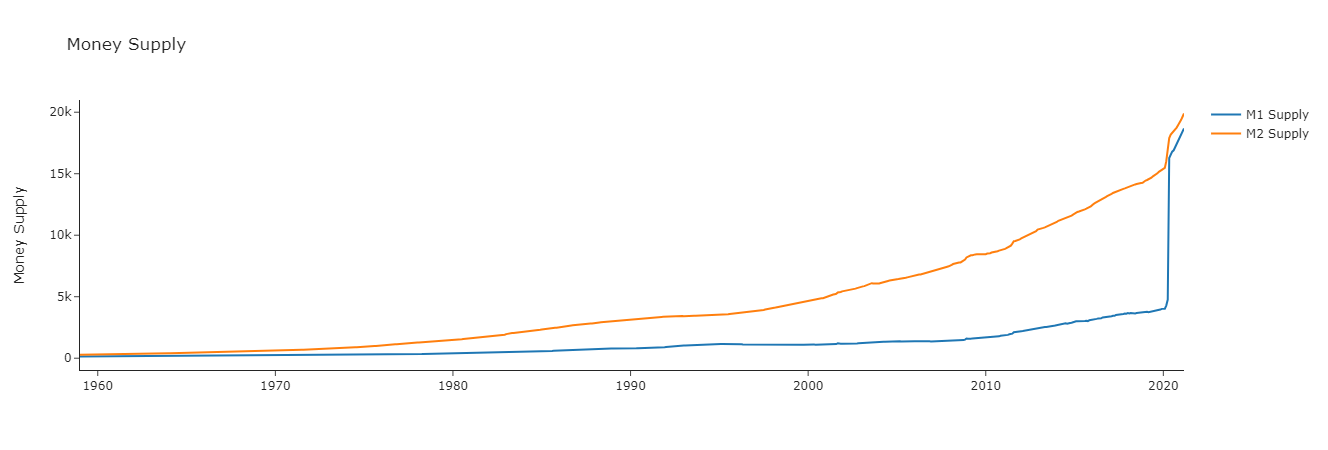

In [19]:
# Plot M1 and M2 Money Supply
money_supply_chart = go.Figure().update_layout(template="simple_white", yaxis=dict(title="Money Supply"), title = "Money Supply")
money_supply_chart.add_trace(go.Scatter(x= M_data.index, y=M_data["M1"],mode='lines', name="M1 Supply"))
money_supply_chart.add_trace(go.Scatter(x= M_data.index, y=M_data["M2"],mode='lines', name="M2 Supply"))

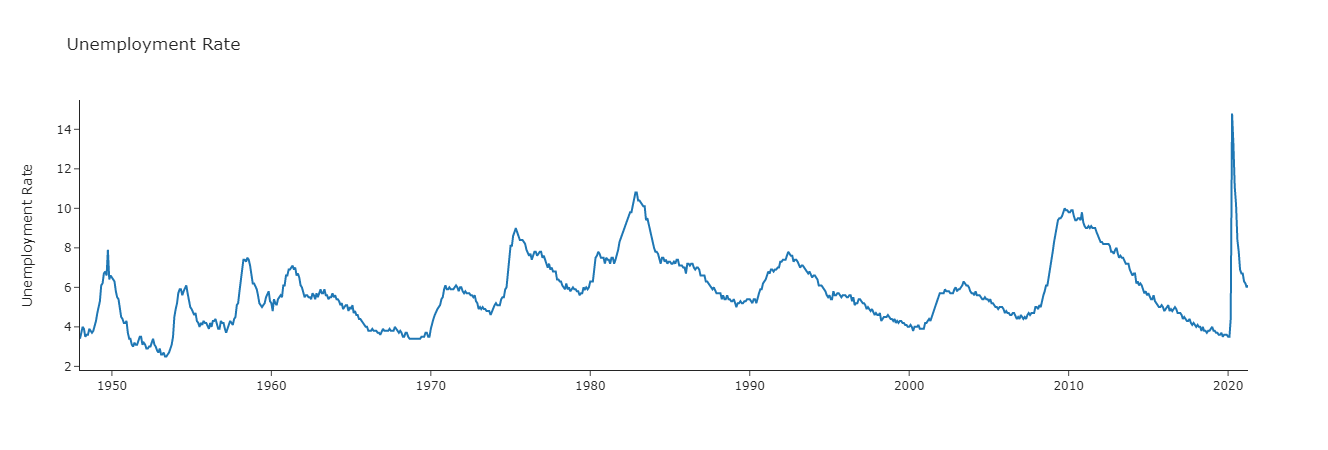

In [20]:
# Get Unemployment Rate Data and graph it
unemployment_rate = quandl.get("FRED/UNRATE")
unemployment_rate.columns = ["Unemployment Rate"]
unemployment_rate["Unemployment Rate"] = unemployment_rate["Unemployment Rate"]
unemployment_rate_chart = go.Figure().update_layout(template="simple_white", yaxis=dict(title="Unemployment Rate"), title = "Unemployment Rate")
unemployment_rate_chart.add_trace(go.Scatter(x= unemployment_rate.index, y=unemployment_rate["Unemployment Rate"],mode='lines', name="Unemployment Rate"))

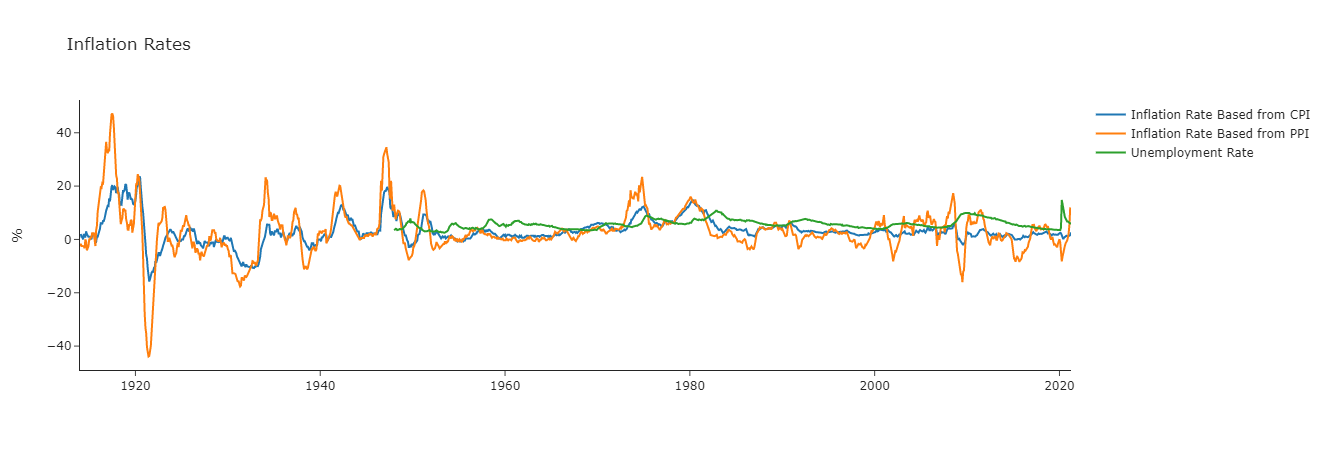

In [21]:
inflation_rates_chart.add_trace(go.Scatter(x= unemployment_rate.index, y=unemployment_rate["Unemployment Rate"],mode='lines', name="Unemployment Rate"))

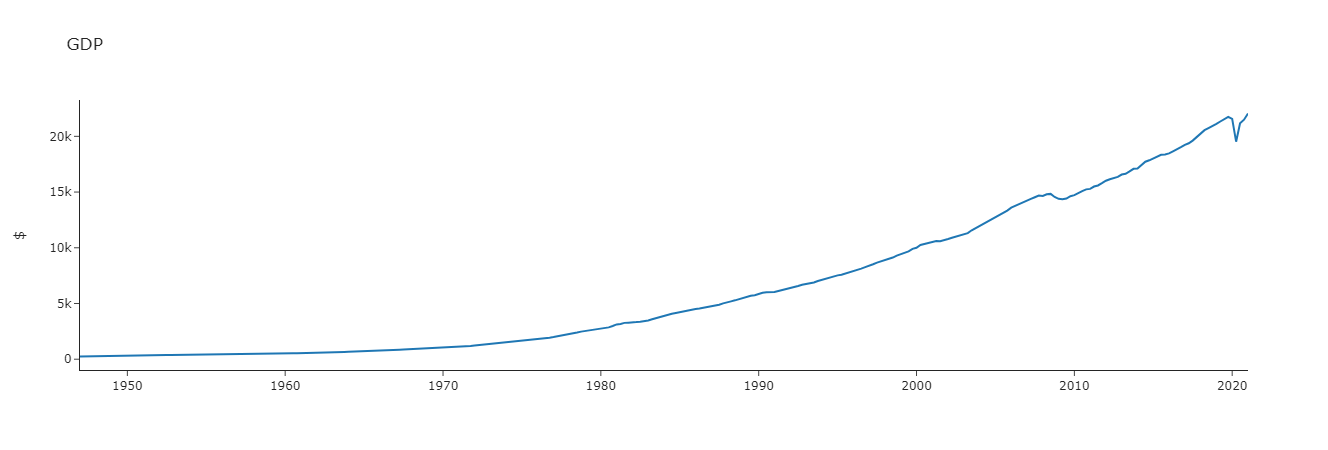

In [118]:
gdp = quandl.get("FRED/GDP")
gdp.columns = ["GDP"]
gdp_chart = go.Figure().update_layout(template="simple_white", yaxis=dict(title="$"), title = "GDP")
gdp_chart.add_trace(go.Scatter(x= gdp.index, y=gdp["GDP"],mode='lines', name="Unemployment Rate"))